# PHS 597: Homework 01

Xingyan "David" Wang

ID: 949211534

Due: 

## Introduction

In [25]:
# Load some common packages
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np
import pandas as pd

This homework requires us to use MNIST (Modified National Institute of Standards and Technology) dataset to correcly classify the hand-written numbers. 

There are 4 main data sets for this project. These datasets can be directly imported from keras package in Python. We loaded these 4 data sets into train_images, train_labels, test_images and test_labels using the following programming. 

In [26]:
# Import data

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()




These two datasets are gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
There are 4 data sets: train_images, train_labels, test_images and test_labels. train_images include xxx observations and their labels are instored in train_labels. Similarly, we have test_images and test_labels
The train.csv data set contain 42,000 observations with labels. Each labels is the truth for the number that represented. 

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

/Users/xingyanwang/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


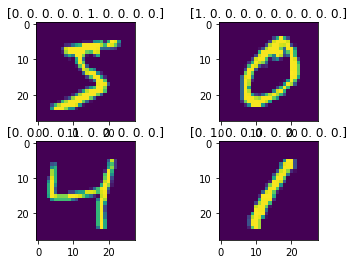

In [5]:
fig, axs = plt.subplots(2,2)
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(train_images[ii*2+jj,:,:])
        axs[ii,jj].title.set_text(train_labels[ii*2+jj])

Furthermore, we can check the dimension of each dataset. First the dimension of training data set.

In [27]:
train_images.shape

(60000, 28, 28)

Then we can see the labels (or the "truth") of the training data set. 

In [28]:
len(train_labels)

60000

Additionally, we can see the distribution of these numbers in the training data set

In [29]:
train_labels.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Then we can see the same for the test data set

In [30]:
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

Before we start model our data, we need to do some data standarization to make sure that there is no outliers gonna influence the analysis. Additionally, we need to reshape the data into array, so that it will be easier for later analysis. 

In [31]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Nerual Network

As we shown in the class, this question can be solved using nerual network approach. 

In [ ]:
# Import necessary modules
from keras import models
from keras import layers


from keras.utils import to_categorical
# make the data type into catgeorical level
# make it 10 rows and 2 columns
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Then we can fit nerual network. Due to the large sample size and the limitation of my PC's calcualtion ability. The

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

## Machine Learning Methods

For this section, we would like to use some common machine learning techniques to perform this work. 

### KNN (K-Nearest Neighbour)

In [32]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
print(knn.score(test_images, test_labels)) 

0.9688


From above, we can see that the accuarcy for KNN methods on test datat set is 0.9688. 
One thing for KNN method is that we need to pre-specify the number of neighbours, i.e. 5 in the upper case. However, this value can influence the model performance of the predicition in the test data set. A lower value can result in prefect predicition in the training set but may results in the a bad prediction in the test data, which is usually refered to overfitting in the test data set. Next, we would like to see the influence of this value. 

First, we created a sequence of number from 5 to 100 by 10 to represent number of neighbourhood that we will consider. Additionally, we create two empty arrary train_accuracy and test_accuracy to store future accuracy for training data set and test data set. 

In [30]:
neighbors = np.arange(5, 100, 10) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

Next, we would like to loop over different values of K to build KNN models and evalue the accuracy for training data set and test data set. 

In [ ]:
# Loop over different K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    knn.fit(train_images, train_labels)
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(train_images, train_labels) 
    test_accuracy[i] = knn.score(test_images, test_labels)
  

In order to be more intuitive, we can plot the training data accuracy and testing data accuracy against the number of neighbours: 

In [ ]:
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

$\alpha$



### SVM (Support Vector Machine)

Next, we would like to use SVM (Suppor vector machine) approach to perform this job. 

In [4]:
# Import necessary modules 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [5]:
svc = LinearSVC()
svc.fit(train_images, train_labels)

/Users/xingyanwang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

After building the SVM, we can first look at the prediction accuracy on the training dataset: 

In [17]:
train_pred = svc.predict(train_images)
train_prediction = confusion_matrix(train_labels, train_pred)
# prediction = pd.DataFrame(prediction)
print(train_prediction)
print(np.trace(train_prediction)/np.sum(train_prediction))

[[5801    1   13    9    9   18   25    4   36    7]
 [   1 6601   30   11    7   23    3   11   47    8]
 [  40   45 5415   83   57   26   57   70  146   19]
 [  20   26  153 5493   11  171   20   54  121   62]
 [   9   23   30    7 5485   15   30   14   53  176]
 [  53   23   40  167   60 4780   96   17  124   61]
 [  30   12   29    3   27   77 5707    2   28    3]
 [  12   21   57   13   52   10    6 5906   17  171]
 [  46  129   71  143   43  158   46   26 5104   85]
 [  25   19   28  105  184   44    2  195   51 5296]]
0.9264666666666667


We can see that the accuracy for training dataset is 0.9265. Next, we would like to see the prediction performance on the test dataset. 

In [13]:
test_pred = svc.predict(test_images)
prediction = confusion_matrix(test_labels, test_pred)
# prediction = pd.DataFrame(prediction)
print(prediction)

[[ 962    0    2    1    1    4    5    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  911   18   10    4   13   12   39    3]
 [   4    0   19  918    2   22    5   12   20    8]
 [   1    4    5    4  913    0    9    3    6   37]
 [   9    2    0   40   12  765   19    7   30    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   23    5    7    1    1  948    5   28]
 [  10   12    8   22   14   31    8   13  844   12]
 [   7    8    2   15   31   12    0   26   12  896]]


We can see from the above matrix that the diagonal elements are the correctly classified elements, while the off diagnoal are those mis-correclty classified elements. Based on this, we can calculate the accuracy of SVM for the test data set: 

In [16]:
np.trace(prediction)/np.sum(prediction)

0.9178

### Random Forest (Tree-based Method)

In [11]:
from sklearn.ensemble import RandomForestRegressor

First we would like to fit the model. We use 

In [ ]:
encoder = LabelEncoder()
encoded_train_labels = pd.Series(encoder.fit_transform(train_labels))

In [47]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(train_images, encoded_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Then we would like to see the the prediction error 

In [48]:
predictions = rf.predict(test_images)
print(predictions)

[7.  1.9 1.  ... 4.  4.7 5.9]


In [49]:
errors = abs(predictions - test_labels)
print(errors)


[0.  0.1 0.  ... 0.  0.3 0.1]


## AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [38]:
encoder = LabelEncoder()
encoded_train_labels = pd.Series(encoder.fit_transform(train_labels))
# print(encoded_train_labels)

Then we can fit AdaBoost model. max_depth option tells our model that we’d like our forest to be composed of trees with a single decision node and two leaves. n_estimators tells out model that we would like to build the number of trees in the model. 

In [50]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=200
)
classifier.fit(train_images, encoded_train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

Similarly, as for performance criteria, we use test data prediction accuracy and test data prediction accuracy. First, let's take a look at the test data prediction accuracy: 

In [51]:
predictions = classifier.predict(test_images)

In [52]:
predictions = classifier.predict(test_images)
print(predictions)

[7 3 1 ... 4 5 6]


In [53]:
confusion_matrix(test_labels, predictions)

array([[ 914,    0,    9,    2,    0,   40,    7,    1,    5,    2],
       [   0, 1103,    4,    6,    1,    2,    1,    1,   16,    1],
       [   8,    3,  907,   21,    7,    7,   23,   12,   42,    2],
       [   1,    1,   19,  898,    3,   36,    0,    6,   33,   13],
       [   1,    0,   10,    0,  851,    2,    4,    7,   11,   96],
       [   7,    1,    4,   50,    4,  772,    8,    3,   23,   20],
       [   7,    4,   13,    1,   11,   25,  876,    2,   18,    1],
       [   1,    8,   23,   13,   10,    2,    0,  888,   13,   70],
       [   7,    0,   10,   27,    4,   19,    3,    5,  886,   13],
       [   4,    7,    7,   16,   64,    6,    1,   19,   21,  864]])

In [54]:
np.trace(confusion_matrix(test_labels, predictions))/np.sum(confusion_matrix(test_labels, predictions))

0.8959

Notice that we are using two parameters here, max_depth and n_estimators. We then, would like to investigate the influnce these two parameters. Due to the limitation of my PCs capacity, 

In [61]:
max_depth_range = np.arange(2, 4) 
n_estimators_range = np.arange(100, 200, 50)

In [63]:

train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
print(max_depth_range)
print(n_estimators_range)

[2 3]
[100 150]


In [ ]:
# Loop over different max_depth values and n_estimators 
for i, j in enumerate(max_depth_range): 
    for k, l in enumerate(n_estimators_range): 
        classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=j),n_estimators =l)
        classifier.fit(train_images, encoded_train_labels)
        
        train_predictions = classifier.predict(train_images)
        predictions = classifier.predict(test_images)
        
        train_accuracy[i] = np.trace(confusion_matrix(test_labels, train_predictions))/np.sum(confusion_matrix(test_labels, train_predictions))
        test_accuracy[i] = np.trace(confusion_matrix(test_labels, predictions))/np.sum(confusion_matrix(test_labels, predictions))

## Conclusions

In this homework, we used multiple machine learning and deep learning methods to predict MNIST data set. Methods that we are using include Nerual Network, KNN, SVM (Support Vector Machine), Random Forest, AdaBoost. We use predicition accuracy on both test dataset and training data set as our criteria. After fitting these models, we can summarize results as follow: 